# Cálculo de integrales con SciPy

_`SciPy` es un paquete que incluye una colección de algoritmos matemáticos y funciones construidas sobre el paquete `NumPy`. En este cuaderno nos vamos a centrar en el **cálculo de integrales definidas**._

En primer lugar, __importemos__ lo paquetes que vamos a utilizar:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
plt.ion()

# scipy.integrate

Este subpaquete de `SciPy` proporciona algunas __técnicas de integración tanto de funciones como de ecuaciones diferenciales__. En primer lugar importémoslo y ejecutemos la ayuda para ver cuáles son estas funciones:

In [5]:
# importamos el paquete integrate
from scipy import integrate

In [6]:
from IPython.display import HTML
HTML('<iframe src="http://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate" width="800" height="600"></iframe>')

/home/ale/miniconda3/lib/python3.7/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [7]:
# Ayuda del paquete integrate
# help(integrate)

## quad

Como se puede ver en la ayuda, si queremos realizar una _integración numérica_ de una función de una variable, debemos utilizar `quad` (aunque también podemos usar `trapz`, `simps`). La forma de acceder a ella tal y como hemos importado el paquete sería ejecutando `integrate.quad`. En forma alternativa podemos importar del siguiente modo:

In [8]:
from scipy.integrate import quad

De esta forma podremos invocar la función quad, simplemente como `quad`. 

In [9]:
help(quad)

Help on function quad in module scipy.integrate.quadpack:

quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50)
    Compute a definite integral.
    
    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.
    
    Parameters
    ----------
    func : {function, scipy.LowLevelCallable}
        A Python function or method to integrate. If `func` takes many
        arguments, it is integrated along the axis corresponding to the
        first argument.
    
        If the user desires improved integration performance, then `f` may
        be a `scipy.LowLevelCallable` with one of the signatures::
    
            double func(double x)
            double func(double x, void *user_data)
            double func(int n, double *xx)
            double func(int n, double *xx, void *user_data)
    
        The ``user_data`` is the d

Tal vez [esta ayuda](http://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate) nos resulte más atractiva.

Definamos la función a integrar:

$$f(x) = x \cdot sin(x)$$

In [15]:
def fun(x):
    return x * np.sin(x)

##### Ejercicio

Antes de integrarla generemos esta gráfica:

![](../images/quad_xsinx.png)

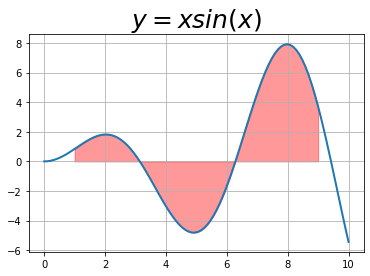

In [17]:
# generar x, y
x = np.linspace(0,10,100)
y = fun(x)

# título
plt.title('$y = x sin(x)$', fontsize = 25)

# graficar la línea
plt.plot(x,y, linewidth = 2)

# graficar el relleno
x_fill = np.linspace(1,9,100)
y_fill = fun(x_fill)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.4)

# incrustar la cuadrícula
plt.grid()

#### Integremos usando `quad`

Integremos la función en el intervalo $[2, 9]$.

In [18]:
value, err = quad(fun, 1, 9)
print("El resultado es: ", value, "con un error de: ", err)

El resultado es:  8.311122163264091 con un error de:  3.012308065089729e-13


####  Integremos usando Simpson y Trapecio

Ambos métodos aceptan como argumentos las coordenadas de los puntos (no la función). Esto puede ser útil cuando no disponemos de una función, sino de una serie de valores que, por ejemplo, provienen de un experimento.

![](../images/trap_xsinx.png)

In [19]:
x = np.linspace(2,9,100)

value = integrate.trapz(fun(x), x)

print("El resultado es: ", value)

El resultado es:  6.867422661707985


In [20]:
x = np.linspace(2,9,100)

value = integrate.simps(fun(x), x)

print("El resultado es: ", value)

El resultado es:  6.870575909500406


In [1]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../styles/aeropython.css'
HTML(open(css_file, "r").read())